In [36]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [37]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000)
X_plot_test = X_test.copy()
y_plot_test = y_test.copy()

In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_plot_test_reduced= tsne.fit_transform(X_plot_test)

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [40]:
X_plot_test_reduced

array([[-44.92586  , -19.806684 ],
       [-54.389626 ,  20.696836 ],
       [-48.545334 , -20.645744 ],
       ...,
       [  3.6508365,  -2.3245814],
       [ -5.318307 ,  60.998264 ],
       [-50.278873 ,  -5.800741 ]], dtype=float32)

In [41]:
y_test

array([9, 9, 9, ..., 2, 1, 4], dtype=uint8)

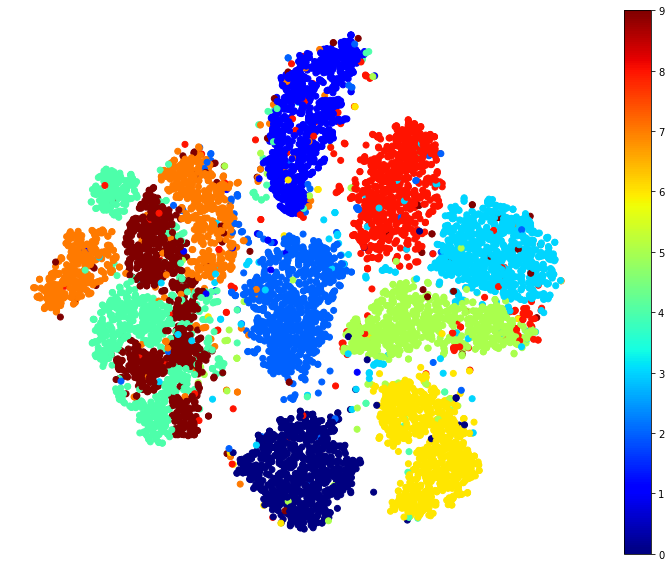

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_plot_test_reduced[:, 0],X_plot_test_reduced[:, 1],c=y_test, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

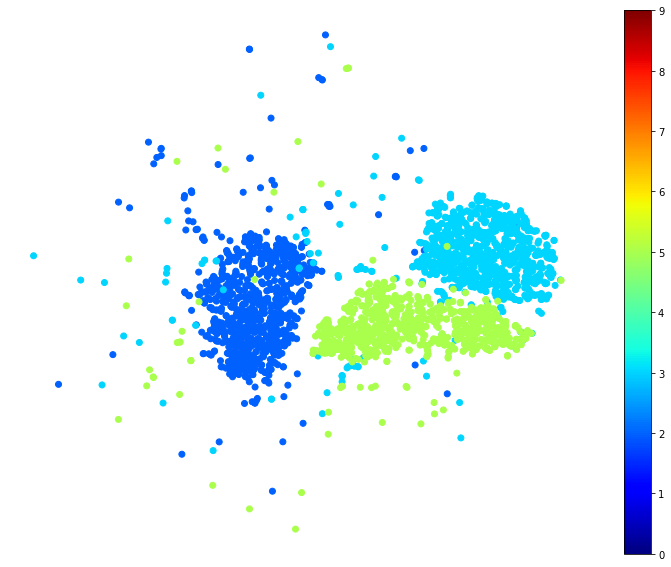

In [43]:
plt.figure(figsize=(13,10))

digits = []
X_plot=[[],[]]

for digit in (2,3,5):
    X_plot[0] = X_plot[0]+list(X_plot_test_reduced[y_test == digit, 0])
for digit in (2,3,5):
    X_plot[1] = X_plot[1]+list(X_plot_test_reduced[y_test == digit, 1])  
    
for i in (2,3,5):
    for j in range(len(X_plot_test_reduced[y_test == i, 0])):
        digits.append(i)   

plt.scatter(X_plot[0],X_plot[1],c=digits, cmap='jet')


plt.axis('off')
plt.colorbar()
plt.clim(0, 9)
plt.show()

In [44]:
idx = (y_plot_test == 2) | (y_plot_test == 3) | (y_plot_test == 5) 
X_subset = X_plot_test[idx]
y_subset = y_plot_test[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [45]:
idx

array([False, False, False, ...,  True, False, False])

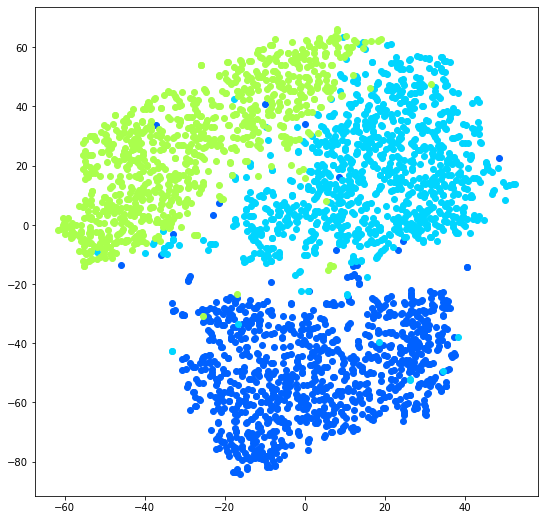

In [46]:
plt.figure(figsize=(9,9))
import matplotlib as mpl
cmap = mpl.cm.get_cmap("jet")
for digit in (2,3,5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1],
               c=[cmap(digit/9)])
plt.show()

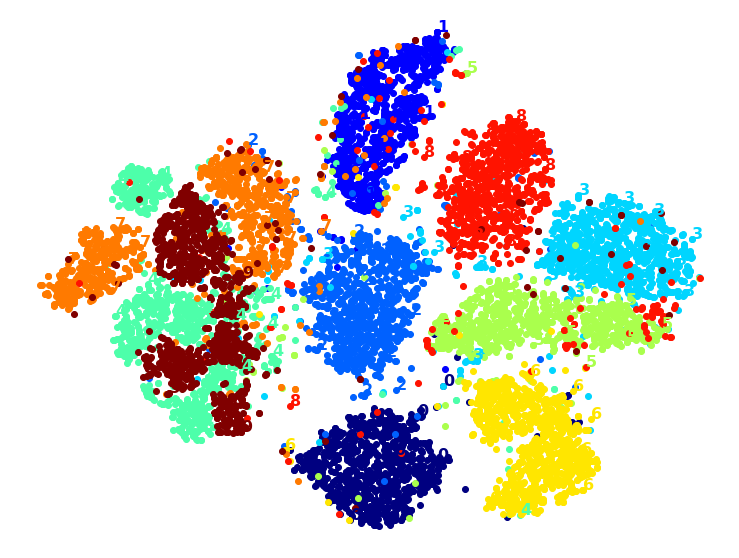

In [47]:
# visualize a few digits from each cluster
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)
plot_digits(X_plot_test_reduced, y_plot_test)

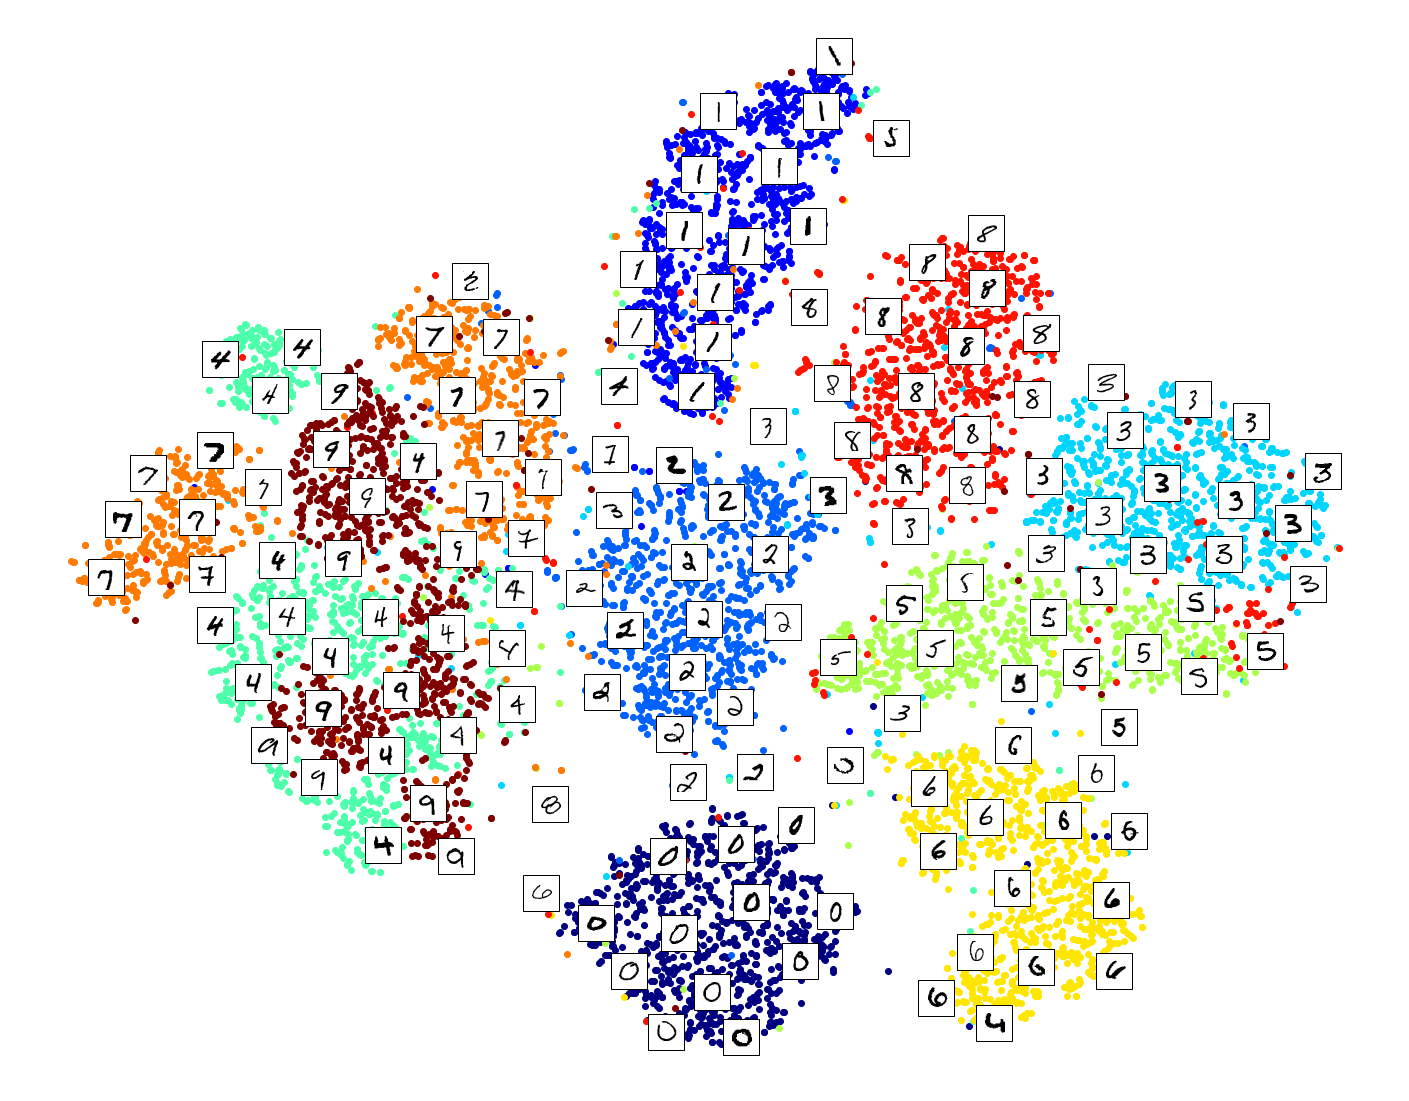

In [52]:
plot_digits(X_plot_test_reduced, y_plot_test, images=X_plot_test, figsize=(25, 20))

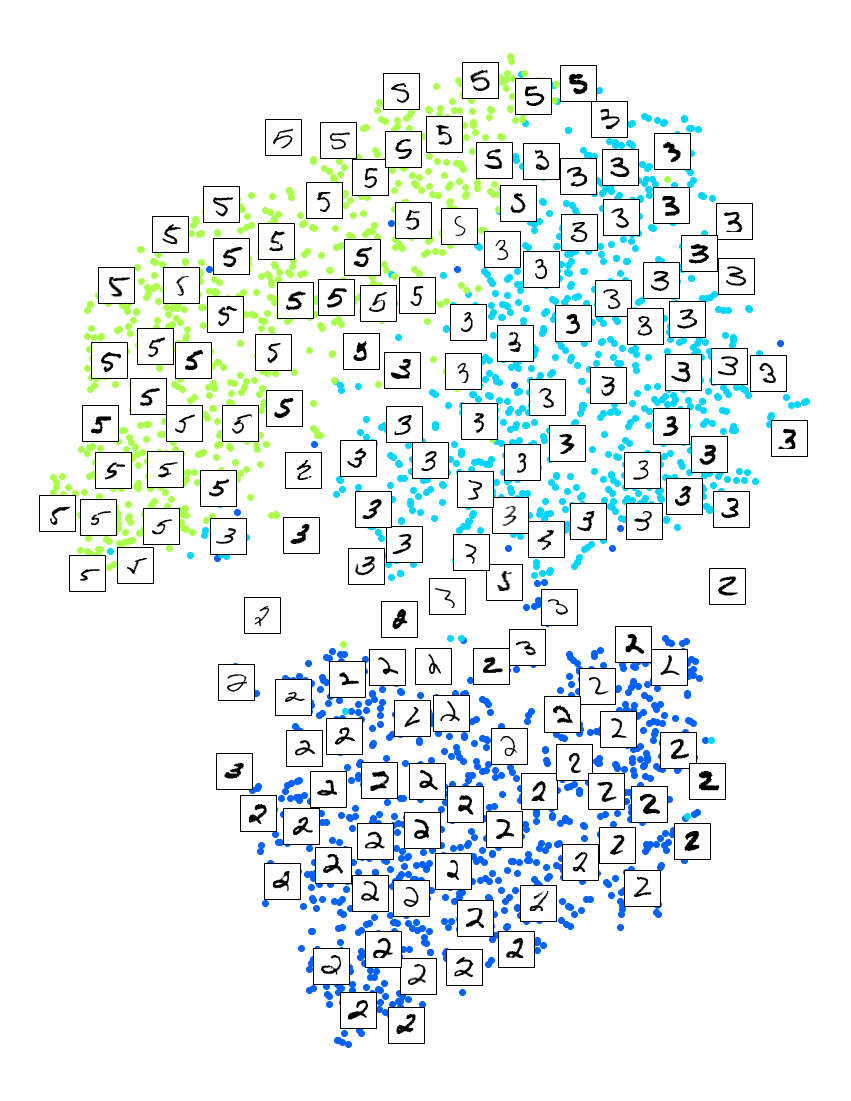

In [54]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(15, 20))

In [ ]:
# try LLE

In [57]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle_reduced = lle.fit_transform(X_plot_test)


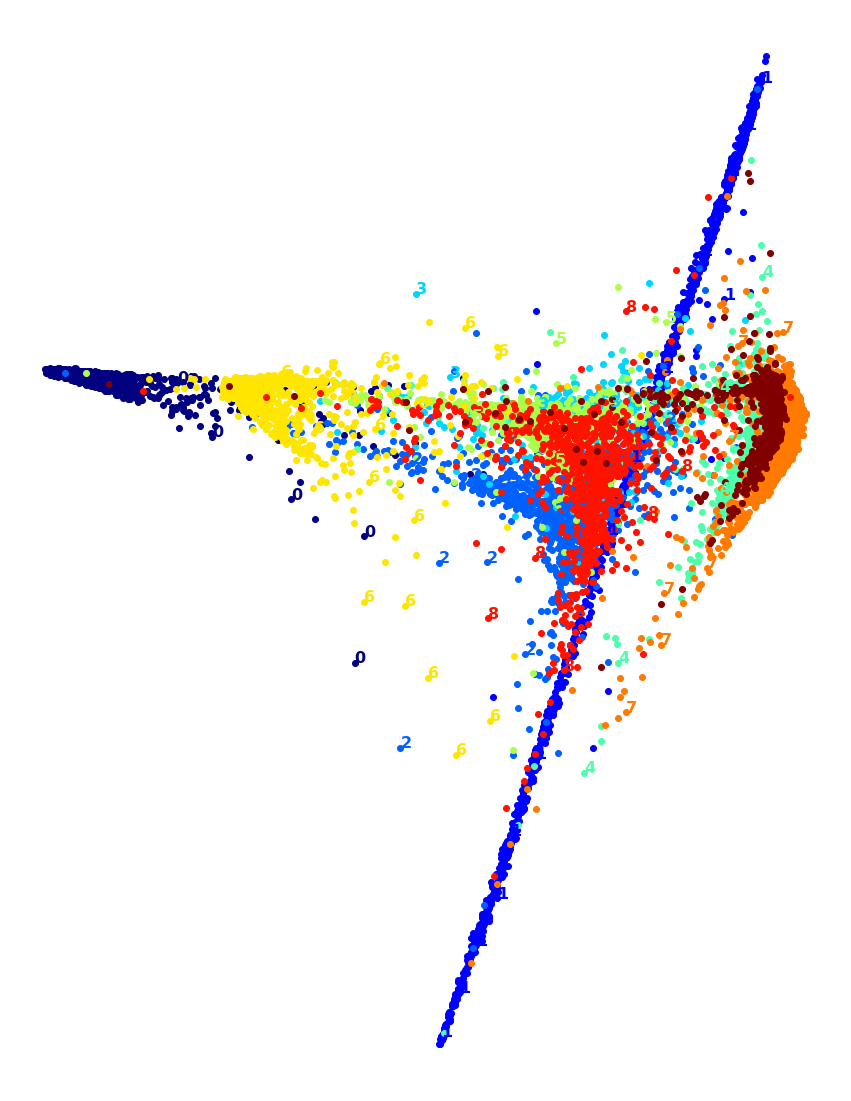

In [58]:
plot_digits(X_lle_reduced, y_plot_test, figsize=(15, 20))

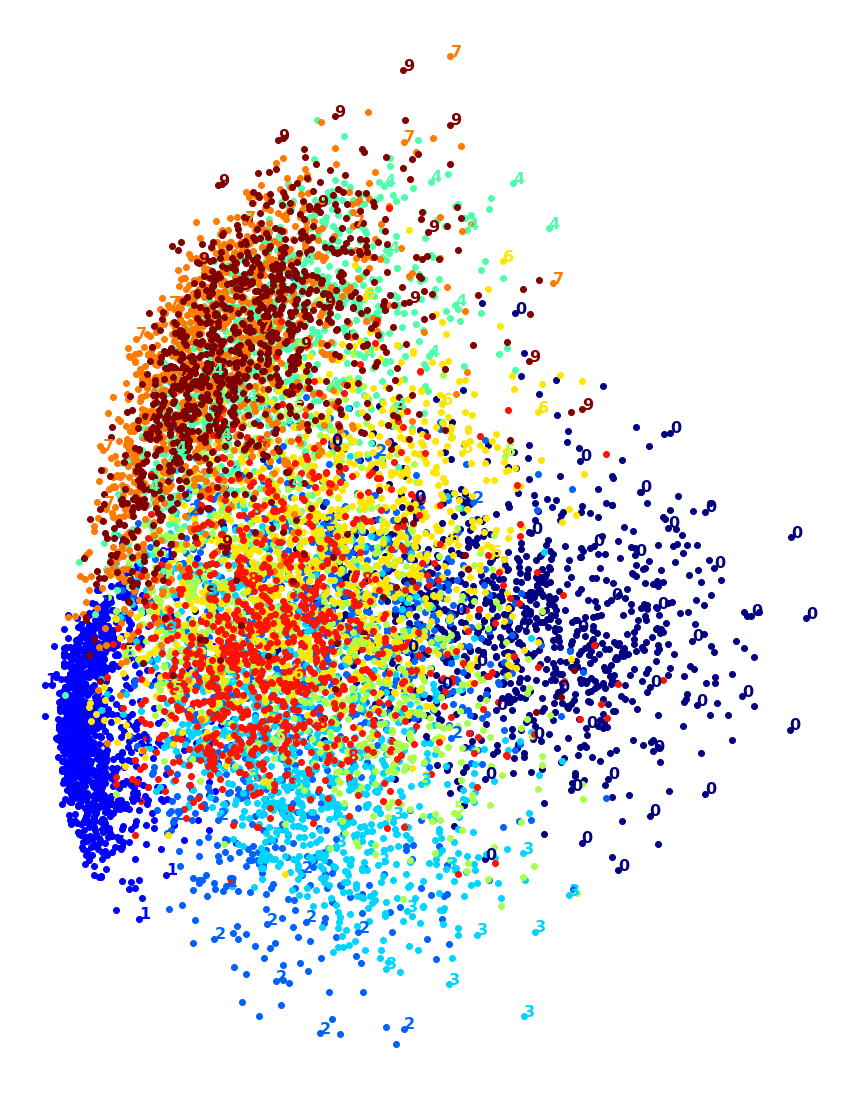

In [56]:
# try PCA
from sklearn.decomposition import PCA
pca = PCA(n_components =2, random_state=42)
X_pca_reduced = pca.fit_transform(X_plot_test)
plot_digits(X_pca_reduced, y_plot_test, figsize=(15, 20))

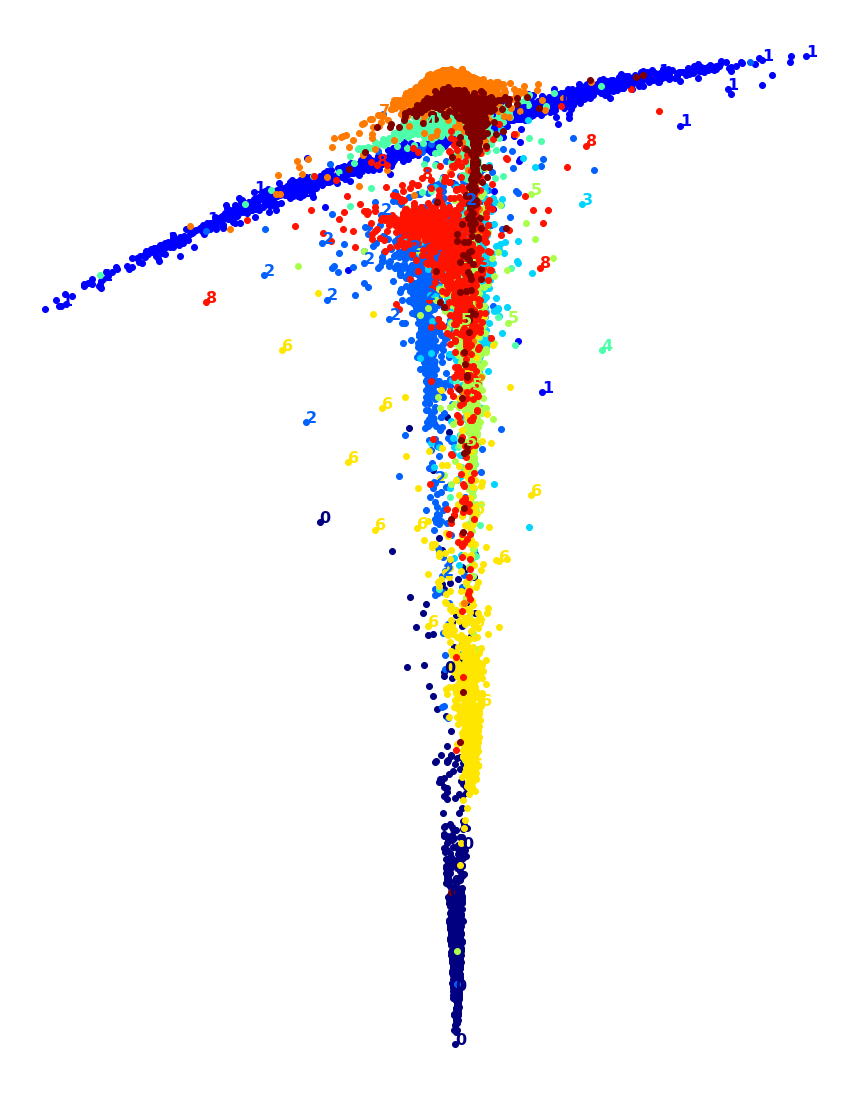

In [61]:
# try a model of 0.95 accuracy with both pca and lle
# first, 0.95 accuracy by PCA and then lle to 2-D
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([("pca", PCA(n_components =0.95, random_state=42)),
                     ("lle",LocallyLinearEmbedding(n_components=2,
                                                         n_neighbors=10))])
X_pca_lle_reduced = pca_lle.fit_transform(X_plot_test)
plot_digits(X_pca_lle_reduced, y_plot_test, figsize=(15, 20))

# this is much faster

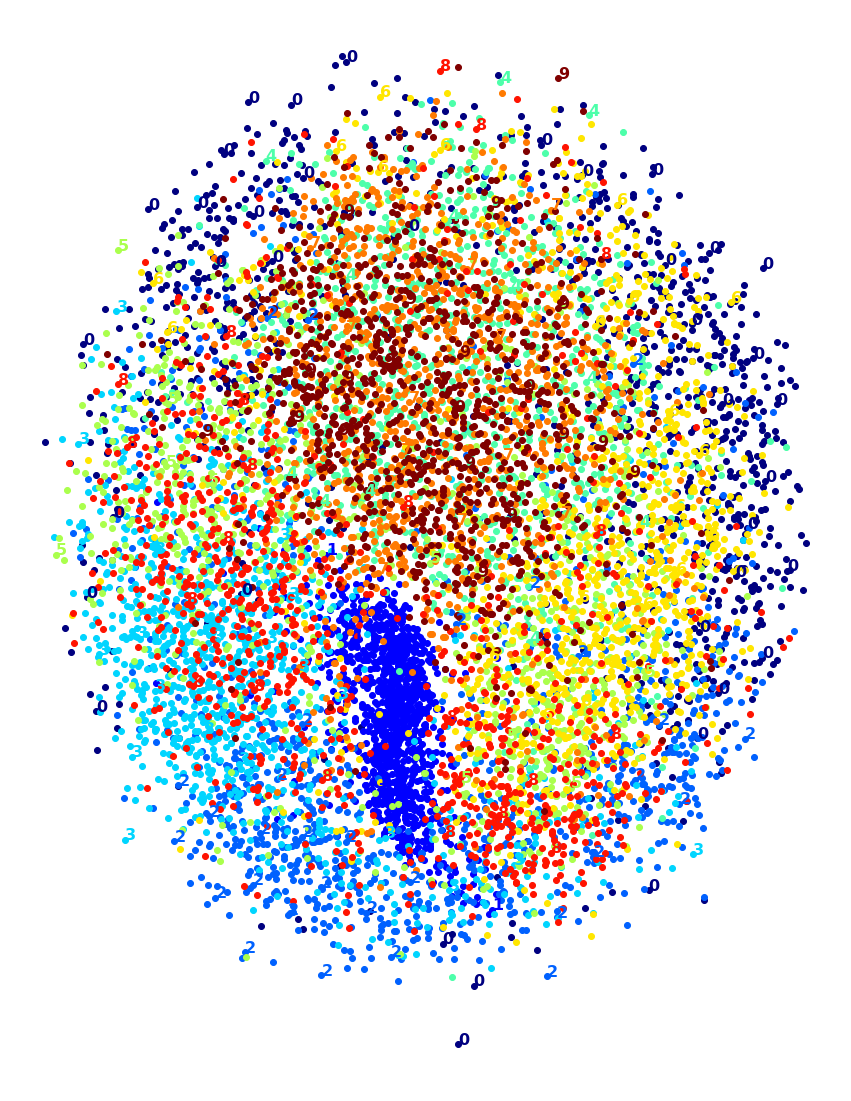

In [62]:
# try MDS
from sklearn.manifold import MDS
mds=MDS(n_components=2, random_state=42)
X_mds_reduced = mds.fit_transform(X_plot_test)
plot_digits(X_mds_reduced, y_plot_test, figsize=(15, 20))

In [ ]:
# pipeline to try PCA fitst and MDS
pca_mds = Pipeline([("pca", PCA(n_components =0.95, random_state=42)),
                     ("mds",MDS(n_components=2, random_state=42)),
                                                         ])
X_pca_mds_reduced = mds.fit_transform(X_plot_test)
plot_digits(X_pca_mds_reduced, y_plot_test, figsize=(15, 20))
# super time costing!!

In [ ]:
# LDA, super fast
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
X_lda_reduced = lda.fit_transform(X_plot_test)
plot_digits(X_lda_reduced , y_plot_test, figsize=(15, 20))